# Hey this is notebook for Play store ratings prediction

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('googleplaystore.csv')
df.head()
#df.shape

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# The dataset consists of 13 columns 10841 rows.
The columns in this dataset are namely 
1. App - Contains  the name of the App [Non Numeric]
2. Category - Each app that belongs to a category is assigned [Categorical]
3. Rating - The rating of the app by the user [Numeric]
4. Reviews - The no. of reviwes that app recieved from the users [Non Numeric]
5. Size - Size of the App [Numeric]
6. Installs - No. of installs of app [Numeric]
7. Type - Free/Paid [Categorical]
8. Price - Exists only if app is Paid Type [Numeric]
9. Content Rating - The content of the app it belongs [Categorical]
10. Genres - Genre of the App[Categorical]
11. Last Updated - Last updated by developers [Numeric]
12. Current ver - Current version details [Numeric]
13. Andriod ver - ANdriod version it supported [Numeric]


In [2]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [4]:
#Investing the DATASET

In [5]:
#Creating a copy of the data set for Cleaning Purpose
df_copy = df.copy()
#df_copy.head()
df_copy.shape

(10841, 13)

In [6]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#null checking the dataframe
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#drop the unncessary columns which may not contribute to ratings of the app
not_req = ['Genres','Last Updated', 'Current Ver', 'Android Ver']
df_copy.drop(not_req,axis = 1, inplace = True)

In [9]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


Cleaning "Installs" column for making it numeric

In [10]:
#Replace specials symbols
df_copy['Installs'] = df['Installs'].replace({'1,000,000+':1000000,
'10,000,000+':10000000,
'100,000+':100000,
'10,000+':10000,
'1,000+':1000,
'5,000,000+':5000000,
'100+':100,
'500,000+':500000,
'50,000+':50000,
'5,000+':5000,
'100,000,000+':100000000,
'10+':10,
'500+':500,
'50,000,000+':50000000,
'50+':50,
'5+':5,
'500,000,000+':500000000,
'1+':1,
'1,000,000,000+':1000000000,
'0+':0})

In [11]:
#Removing garbage value i.e Installs is mentioned as "Free"
df_copy = df_copy[df_copy.Installs !="Free"]

In [14]:
#Replace missing ratings with average
#df_copy['Rating'].sum()/(df_copy['Rating'].shape[0])
df_copy["Rating"].fillna(df_copy['Rating'].sum()/(df_copy['Rating'].shape[0]),inplace = True)

In [15]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
dtype: int64

Exploring Size column

In [17]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Type Casting variables to category

In [18]:
df_copy['Installs']= df_copy['Installs'].astype(int)
df_copy['Category'] = df_copy['Category'].astype('category')
df_copy['Content Rating'] = df_copy['Content Rating'].astype('category')
df_copy['Type'] = df_copy['Type'].astype('category')
df_copy['Reviews'] = df_copy['Reviews'].astype('int')

Exploring Price column

In [20]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
#We have one unsual value for the price , 
# It appears to be a garbage value, we drop it

df_copy.drop(df_copy[df_copy['Price'] == 10000000].index, inplace=True)

In [22]:
df_copy['Rating'].unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 3.62177122, 4.8       , 4.9       , 3.6       ,
       3.7       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [23]:
df_copy['Category'].unique()

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', ..., 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']
Length: 33
Categories (33, object): ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', ..., 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

In [24]:
#Cleaingn Size column
#df_copy['Size'].unique()
df_copy['Size'].replace('Varies with device', np.nan, inplace = True )
df_copy.Size = (df_copy.Size.replace(r'[kM]+$','', regex=True).astype(float) *
                         df_copy.Size.str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))

In [25]:
# Removing the dollar symbol
df_copy["Price"]=df_copy["Price"].map(lambda x: x.lstrip('$'))
df_copy['Price'] = df_copy['Price'].astype('float')

In [26]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10840 non-null  object  
 1   Category        10840 non-null  category
 2   Rating          10840 non-null  float64 
 3   Reviews         10840 non-null  int32   
 4   Size            9145 non-null   float64 
 5   Installs        10840 non-null  int32   
 6   Type            10839 non-null  category
 7   Price           10840 non-null  float64 
 8   Content Rating  10840 non-null  category
dtypes: category(3), float64(3), int32(2), object(1)
memory usage: 754.6+ KB


Now the data is ready to be explored and remove potentially garbage value.

## Exploratory data analysis

Which category has the highest share of (active) apps in the market

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\FAIQUE\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


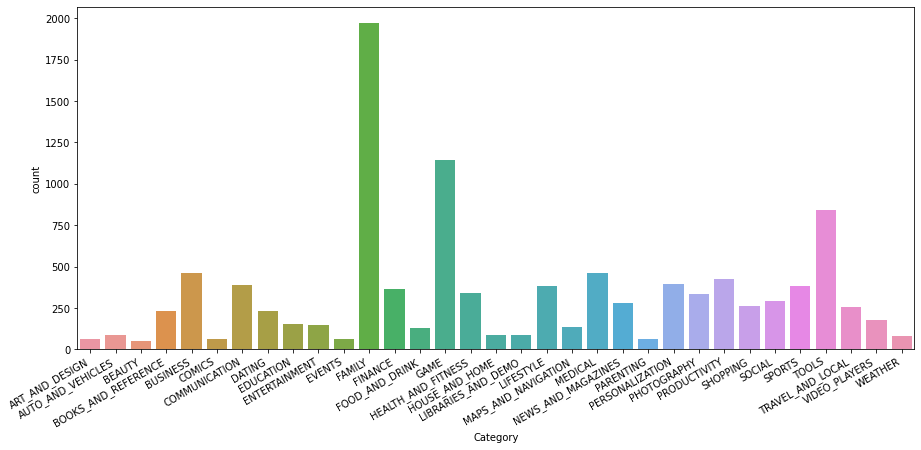

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15,7)
fig.autofmt_xdate()
countplot = sns.categorical.countplot(df_copy.Category, ax = ax)
plt.show(countplot)

In [29]:
top_cat=df_copy.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')
display(top_cat)

,Category,Count
11,FAMILY,1972
14,GAME,1144
29,TOOLS,843
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424


Which Content category has the highest amount of active apps

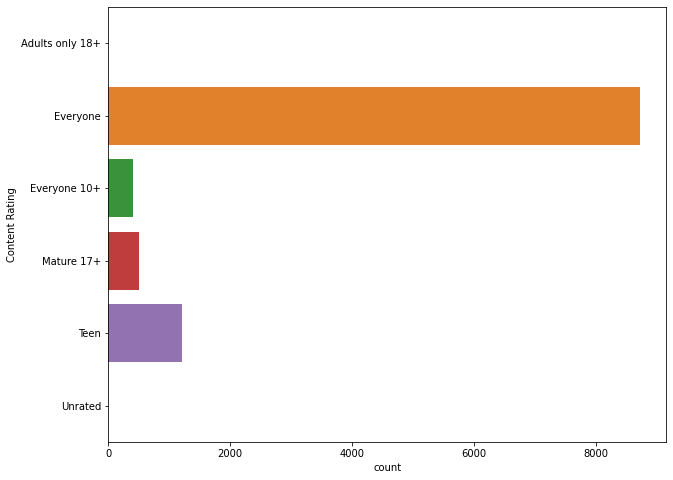

In [180]:
plt.figure(figsize=(10,8))
ax = sns.countplot(y='Content Rating', data=df_copy)

Free Vs Paid App distribution on playstore

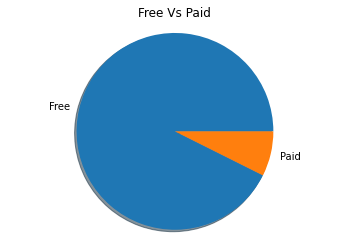

In [184]:
labels=["Free","Paid"]
d=[df_copy["Type"].value_counts()[0],df_copy["Type"].value_counts()[1]]
fig1,ax1=plt.subplots()
ax1.pie(d,labels=labels,shadow=True)
ax1.axis("equal")
plt.title("Free Vs Paid")
plt.show()

Rating of the apps based on the Content Category which it belongs

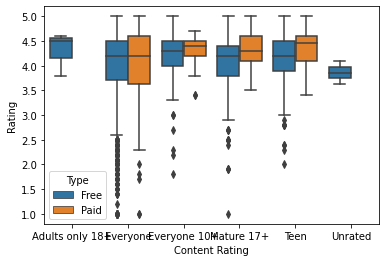

In [182]:
sns.boxplot(x="Content Rating",y="Rating",hue="Type",data=df_copy)
plt.show()

RelationShip between Rating and count of the Reviews

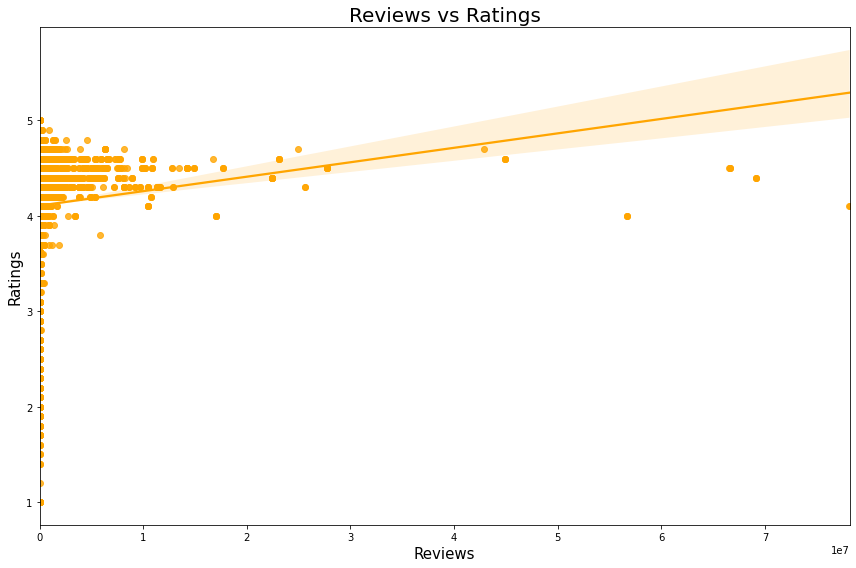

In [183]:
plt.figure(figsize=(12,8))
fig=sns.regplot(x='Reviews',y='Rating',data=df_copy,color='orange')
fig.set_xlabel("Reviews",size=15)
fig.set_ylabel("Ratings",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Reviews vs Ratings',size = 20)
plt.tight_layout()

Distribution of the Ratings on the Playstore for all Apps

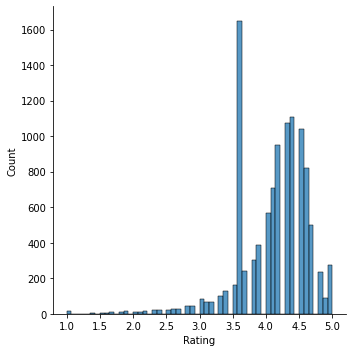

In [30]:
sns.displot(df_copy['Rating'])

# Feature Engineering

Since we have few categorical features it is necessary to encode them for creating our model.

In [113]:
df1 = df_copy.copy()
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19000000.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14000000.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8700000.0,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25000000.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2800000.0,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,53000000.0,5000,Free,0.0,Everyone
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3600000.0,100,Free,0.0,Everyone
10838,Parkinson Exercices FR,MEDICAL,3.621771,3,9500000.0,1000,Free,0.0,Everyone
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,NaN,1000,Free,0.0,Mature 17+


In [114]:
columns = ['App','Price','Installs']
df1.drop(columns,axis = 1,inplace = True)
df1.head()

,Category,Rating,Reviews,Size,Type,Content Rating
0,ART_AND_DESIGN,4.1,159,19000000.0,Free,Everyone
1,ART_AND_DESIGN,3.9,967,14000000.0,Free,Everyone
2,ART_AND_DESIGN,4.7,87510,8700000.0,Free,Everyone
3,ART_AND_DESIGN,4.5,215644,25000000.0,Free,Teen
4,ART_AND_DESIGN,4.3,967,2800000.0,Free,Everyone


In [33]:
X = df1.loc[:,df1.columns.isin(['Rating'])]
Y = df1['Rating']
catgry = pd.get_dummies(df1['Category'],prefix="catg", drop_first=True)
typ = pd.get_dummies(df1['Type'],prefix="typ", drop_first=True)
cntent = pd.get_dummies(df1['Content Rating'],prefix="cntent", drop_first=True)
frames = [catgry,typ,cntent]
X1 = pd.concat(frames, axis =1)
X1.head()

,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,catg_DATING,catg_EDUCATION,catg_ENTERTAINMENT,catg_EVENTS,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cntent_Everyone,cntent_Everyone 10+,cntent_Mature 17+,cntent_Teen,cntent_Unrated
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


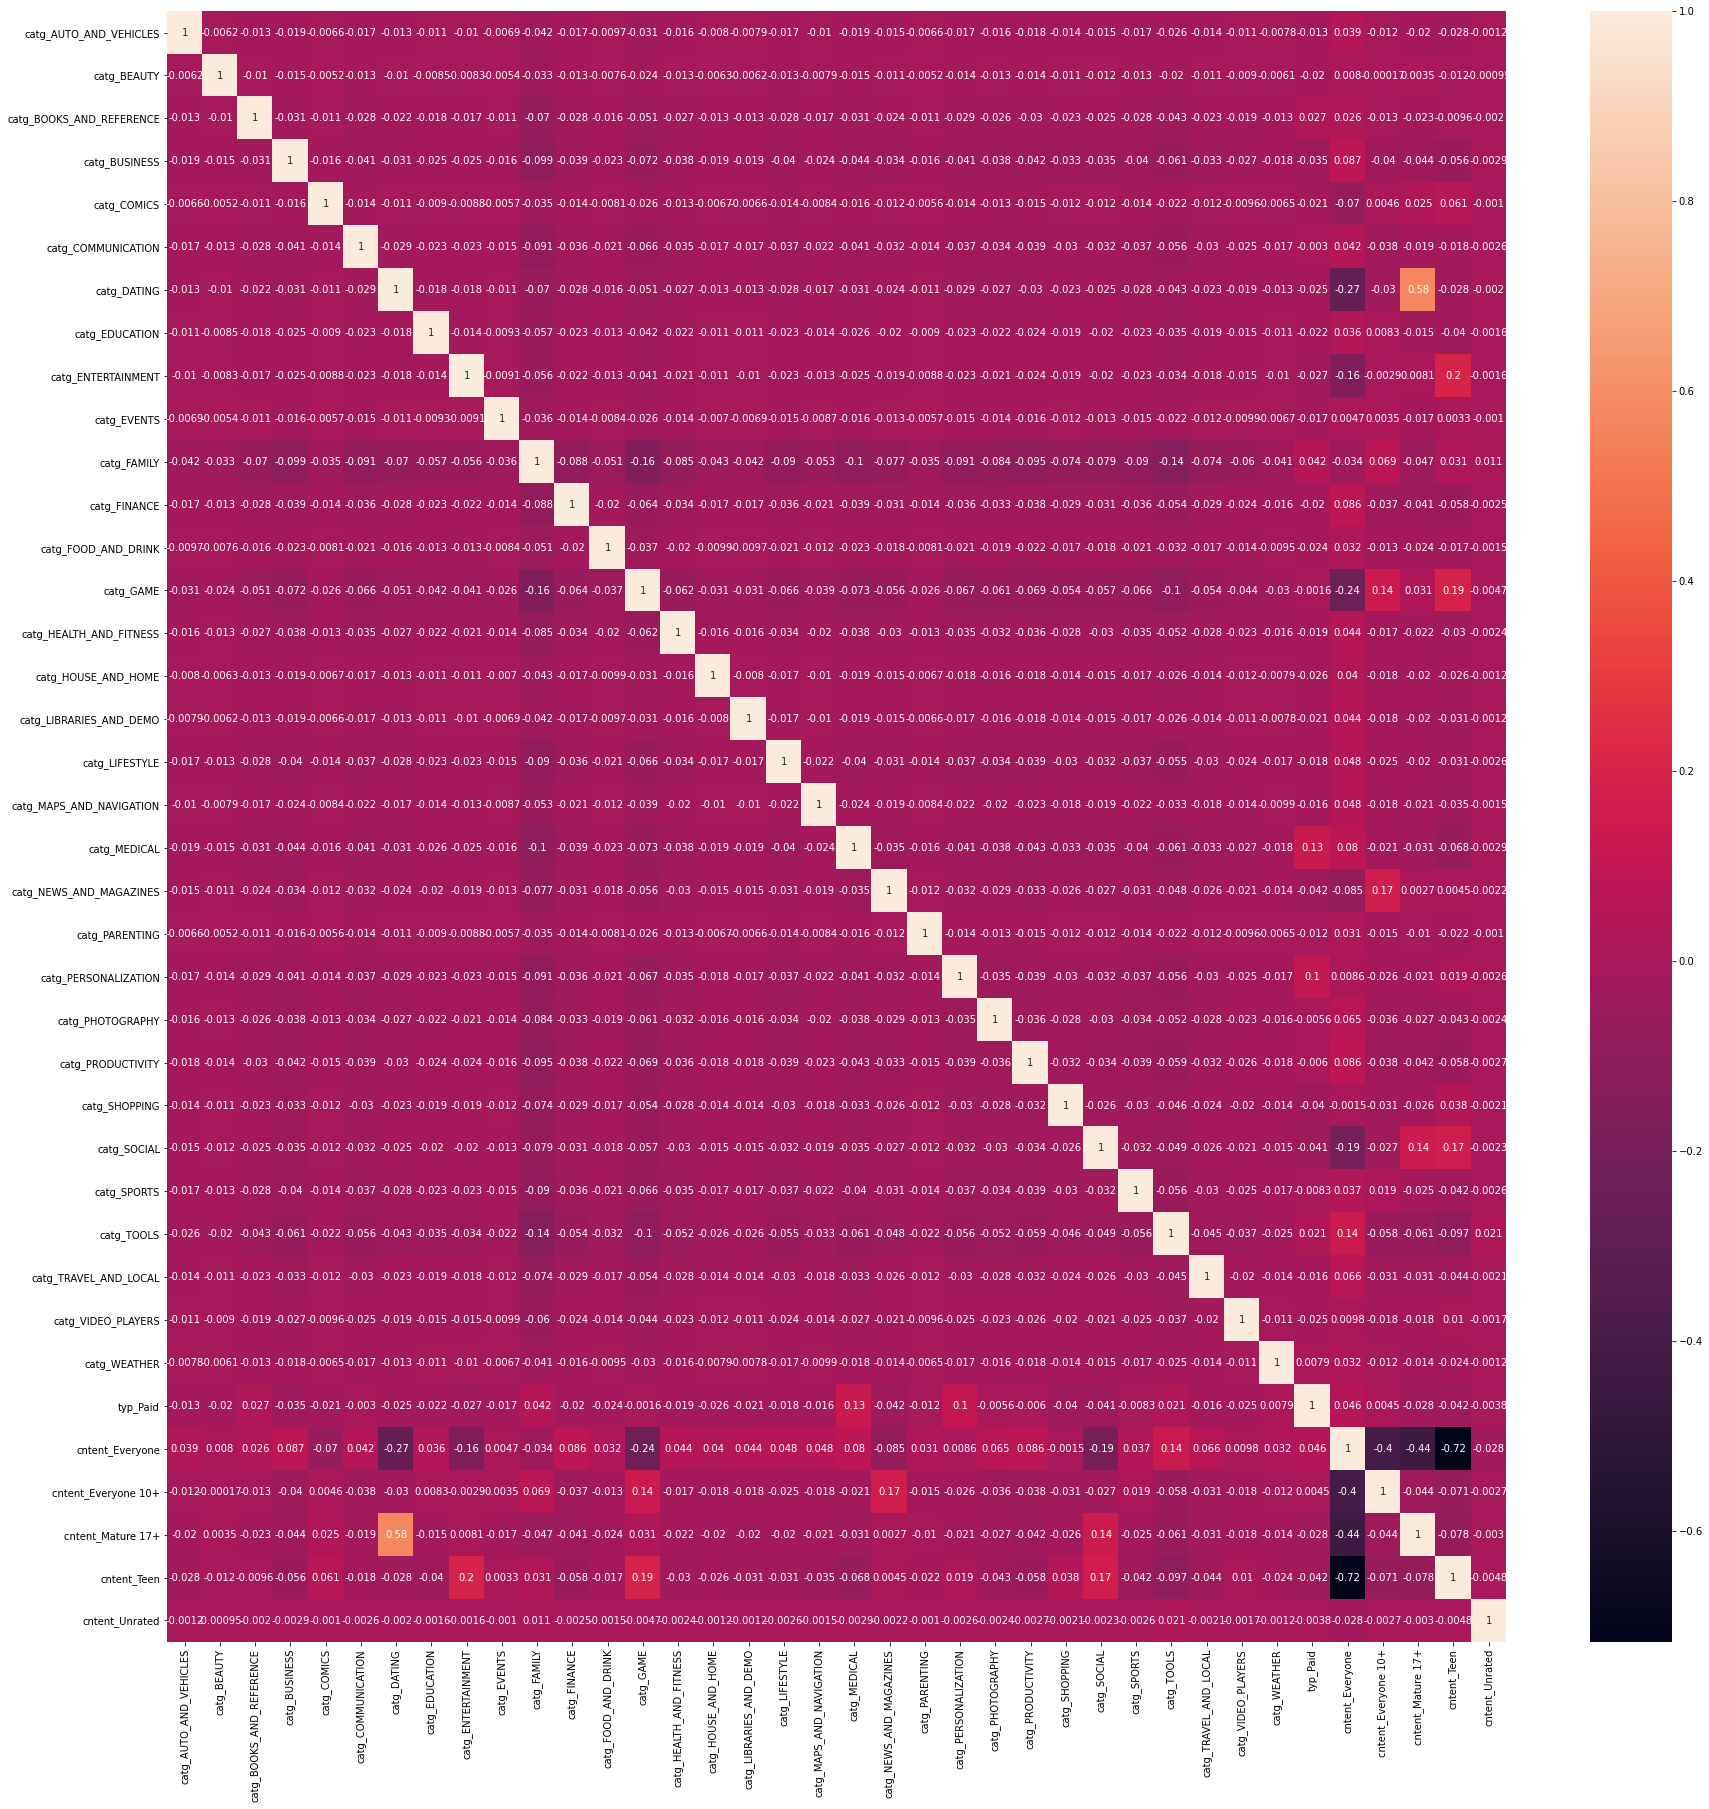

In [34]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(X1.corr(),annot = True)
plt.show()

No auto correlation present

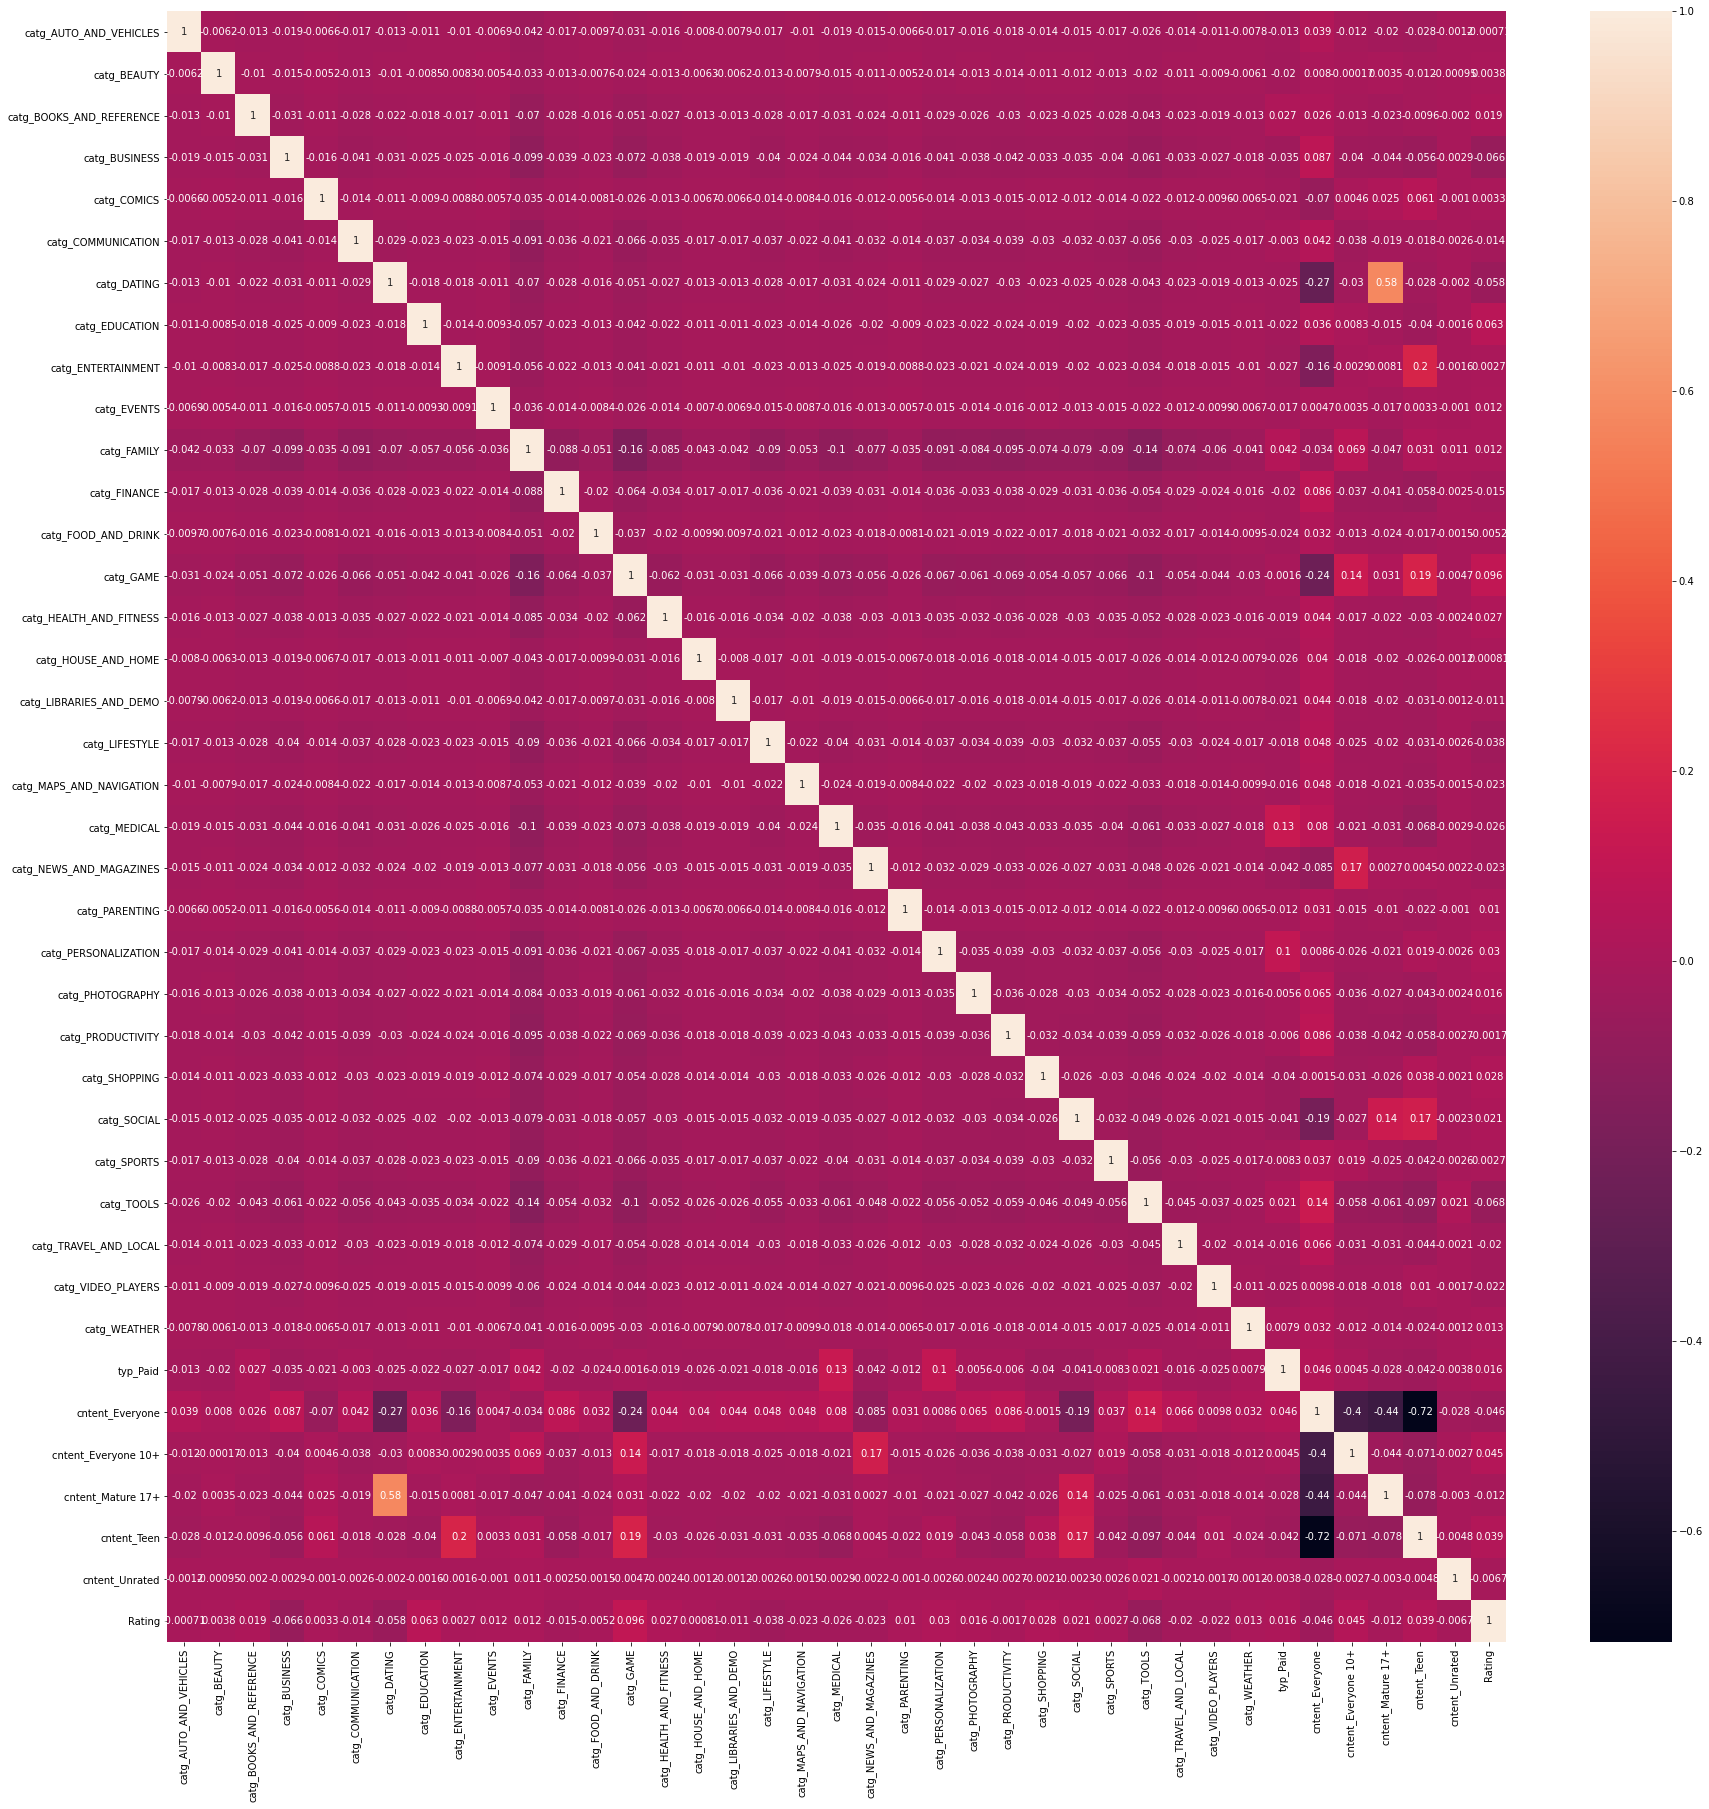

In [35]:
h = [X1,Y]
data  = pd.concat(h,axis=1)
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data.corr(), annot = True)
plt.show()

<AxesSubplot:>

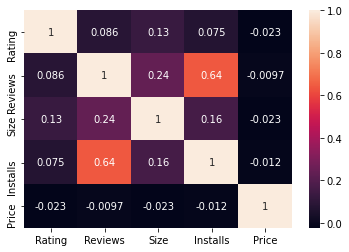

In [36]:
sns.heatmap(df_copy.corr(), annot = True)

We can clearly observe here a clear correlation between Reviews and Install but not much related to the Ratings

# Model Building

Linear regression.
In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. ... Such models are called linear models.

In [37]:
#Train test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size = 0.3, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
"""sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)"""

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [39]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_train = linear_model.predict(X_train_scaled)
rmse_t = np.sqrt(mean_squared_error(y_train,y_pred_train))
r2_t = r2_score(y_train,y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_linear))
r2 = r2_score(y_test,y_pred_linear)
print('Root mean squared error on Training Set', rmse_t)
print('R2 score on Train Set: ', r2_t)
print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)
print("Mean squared error on X test ",mean_squared_error(y_test,y_pred_linear))

Root mean squared error on Training Set 0.5100851974167084
R2 score on Train Set:  0.03673207159522329
Root mean squared error on Testing Set 0.5042722473392992
R2 score on Testing Set:  0.02695062044251484
Mean squared error on X test  0.25429049943662735


In [54]:
rst = pd.DataFrame(y_test.values, columns = ["Y test"])
y_pred_linear_df = pd.DataFrame(y_pred_linear, columns = ["Pred"])
rst = pd.concat([rst , y_pred_linear_df], axis =1)
rst

,Y test,Pred
0,4.3,4.235255
1,3.5,4.112105
2,4.5,4.139026
3,4.4,4.094656
4,4.4,4.263781
...,...,...
3247,4.5,3.989064
3248,4.4,4.061253
3249,4.3,4.235255
3250,4.3,4.170826


We can see from the above results RMSE on test data is 0.504 which is quite significant

In [40]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
lr_c=LogisticRegression(random_state=0)

In [41]:
inty_train = y_train.astype('int')
inty_test = y_test.astype('int')
lr_c.fit(X_train,inty_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(inty_test,lr_pred)
lr_ac=accuracy_score(inty_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.6466789667896679


C:\Users\FAIQUE\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


We have successfully achieved the accuracy of 65% using Linear regression

Decesion treee

# Decision Tree Classification 

DecisionTree Classifier

A decision tree classifier is a tree in which internal nodes are labeled by features. ... The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi

In [115]:
df1.head()

,Category,Rating,Reviews,Size,Type,Content Rating
0,ART_AND_DESIGN,4.1,159,19000000.0,Free,Everyone
1,ART_AND_DESIGN,3.9,967,14000000.0,Free,Everyone
2,ART_AND_DESIGN,4.7,87510,8700000.0,Free,Everyone
3,ART_AND_DESIGN,4.5,215644,25000000.0,Free,Teen
4,ART_AND_DESIGN,4.3,967,2800000.0,Free,Everyone


In [116]:
# importing the required package
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
df1['Category encoded'] = labelencode.fit_transform(df1['Category'])
# finally removing the content ratig column after encoding
df1.drop(["Category"],axis=1,inplace=True)

df1['Content rating encoded'] = labelencode.fit_transform(df1['Content Rating'])
# finally removing the content ratig column after encoding
df1.drop(["Content Rating"],axis=1,inplace=True)





In [117]:
df1

,Rating,Reviews,Size,Type,Category encoded,Content rating encoded
0,4.100000,159,19000000.0,Free,0,1
1,3.900000,967,14000000.0,Free,0,1
2,4.700000,87510,8700000.0,Free,0,1
3,4.500000,215644,25000000.0,Free,0,4
4,4.300000,967,2800000.0,Free,0,1
...,...,...,...,...,...,...
10836,4.500000,38,53000000.0,Free,11,1
10837,5.000000,4,3600000.0,Free,11,1
10838,3.621771,3,9500000.0,Free,20,1
10839,4.500000,114,NaN,Free,3,3


In [118]:
typ = pd.get_dummies(df1.Type, prefix ="type_" )

df1 = pd.concat([df1,typ] , axis =1)

df1

,Rating,Reviews,Size,Type,Category encoded,Content rating encoded,type__Free,type__Paid
0,4.100000,159,19000000.0,Free,0,1,1,0
1,3.900000,967,14000000.0,Free,0,1,1,0
2,4.700000,87510,8700000.0,Free,0,1,1,0
3,4.500000,215644,25000000.0,Free,0,4,1,0
4,4.300000,967,2800000.0,Free,0,1,1,0
...,...,...,...,...,...,...,...,...
10836,4.500000,38,53000000.0,Free,11,1,1,0
10837,5.000000,4,3600000.0,Free,11,1,1,0
10838,3.621771,3,9500000.0,Free,20,1,1,0
10839,4.500000,114,NaN,Free,3,3,1,0


In [147]:
df1 = df1.drop(['Type'],axis=1)
df1

,Rating,Reviews,Size,Category encoded,Content rating encoded,type__Free,type__Paid
0,4.100000,159,19000000.0,0,1,1,0
1,3.900000,967,14000000.0,0,1,1,0
2,4.700000,87510,8700000.0,0,1,1,0
3,4.500000,215644,25000000.0,0,4,1,0
4,4.300000,967,2800000.0,0,1,1,0
...,...,...,...,...,...,...,...
10836,4.500000,38,53000000.0,11,1,1,0
10837,5.000000,4,3600000.0,11,1,1,0
10838,3.621771,3,9500000.0,20,1,1,0
10839,4.500000,114,NaN,3,3,1,0


In [174]:
X2 = df1[df1.columns[1:]]
Y = df1['Rating']
X2["Size"].fillna(X2['Size'].mean(),inplace = True)


C:\Users\FAIQUE\AppData\Roaming\Python\Python36\site-packages\pandas\core\series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Reviews,Size,Category encoded,Content rating encoded,type__Free,type__Paid
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
10836,False,False,False,False,False,False
10837,False,False,False,False,False,False
10838,False,False,False,False,False,False
10839,False,False,False,False,False,False


# Decision tree classifier 

In [175]:
X3 = X2.copy()
Y3 = Y.astype('int')

0        4
1        3
2        4
3        4
4        4
        ..
10836    4
10837    5
10838    3
10839    4
10840    4
Name: Rating, Length: 10840, dtype: int32

In [176]:
#Train test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size = 0.3, random_state=0)

In [178]:
from sklearn.tree import DecisionTreeClassifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

In [179]:
print('DecisionTree_Classifier_accuracy:',dtree_ac)

DecisionTree_Classifier_accuracy: 0.6786592865928659


# Decision tree regressor

In [202]:
df_copy['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int32

In [203]:
X4 = X2.copy()
X4 = pd.concat([X4,df_copy['Installs']], axis = 1)
Y4 = df1["Rating"]
X4

,Reviews,Size,Category encoded,Content rating encoded,type__Free,type__Paid,Installs
0,159,1.900000e+07,0,1,1,0,10000
1,967,1.400000e+07,0,1,1,0,500000
2,87510,8.700000e+06,0,1,1,0,5000000
3,215644,2.500000e+07,0,4,1,0,50000000
4,967,2.800000e+06,0,1,1,0,100000
...,...,...,...,...,...,...,...
10836,38,5.300000e+07,11,1,1,0,5000
10837,4,3.600000e+06,11,1,1,0,100
10838,3,9.500000e+06,20,1,1,0,1000
10839,114,2.151653e+07,3,3,1,0,1000


In [204]:
#Train test Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, Y4, test_size = 0.3, random_state=0)

In [205]:
# Importing the regressor
from sklearn.tree import DecisionTreeRegressor

In [212]:
# Instantiating the regressor
regressor = DecisionTreeRegressor(random_state=0,max_depth=10,max_features='sqrt',max_leaf_nodes=50)

In [213]:
# Fitting the model
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', max_leaf_nodes=50,
                      random_state=0)

In [214]:
y_train_predict = regressor.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

y_pred = regressor.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print('Root mean squared error on Training Set', rmse_train)
print('R2 score on Training Set: ', r2_train)

print('Root mean squared error on Testing Set', rmse)
print('R2 score on Testing Set: ', r2)

Root mean squared error on Training Set 0.46538743552583556
R2 score on Training Set:  0.1981539984592685
Root mean squared error on Testing Set 0.47498296998951295
R2 score on Testing Set:  0.13670182510892148


The accuracy of the the model is approx 48% 